# question 1 | Linear Regression | Elastic Net 

In [1]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 

In [2]:
# data preprocessing 
california_housing = fetch_california_housing()

X_train , X_test , y_train , y_test = train_test_split(california_housing.data,california_housing.target,test_size=0.2,random_state=42)

# standard scaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

#train data frame
california_housing_train_df = pd.DataFrame(X_train,columns=california_housing.feature_names)

california_housing_train_df['Y'] = y_train

#test data frame
california_housing_test_df = pd.DataFrame(X_test,columns=california_housing.feature_names)

california_housing_test_df['Y'] = y_test



In [3]:
# create obj of model
linear_regression = LinearRegression()

# fit model
linear_regression.fit(X_train,y_train)

# predict for train
y_train_predict = linear_regression.predict(X_train)

# r2 score
r2_score_linear_regression_train = r2_score(y_train,y_train_predict)
print("train data r2 score = ",r2_score_linear_regression_train)
#predict for test

y_test_predict = linear_regression.predict(X_test)

r2_score_linear_regression_test = r2_score(y_test,y_test_predict)
print("test data r2 score = ",r2_score_linear_regression_test)

r2_scores_linear_regression_delta = r2_score(y_train,y_train_predict) - r2_score(y_test,y_test_predict)

print("delta r2 score = ",r2_scores_linear_regression_delta)

# coefficients
coefficients = linear_regression.coef_

coefficients_df = pd.DataFrame({"features" : california_housing.feature_names,
    "coefficients" : coefficients})

coefficients_df_sorted = coefficients_df.sort_values(by= 'coefficients',ascending=False)

coefficients_df_sorted


train data r2 score =  0.6125511913966952
test data r2 score =  0.575787706032451
delta r2 score =  0.03676348536424423


,features,coefficients
0,MedInc,0.854383
3,AveBedrms,0.339259
1,HouseAge,0.122546
4,Population,-0.002308
5,AveOccup,-0.040829
2,AveRooms,-0.294410
7,Longitude,-0.869842
6,Latitude,-0.896929


تفاوت خیلی کمی بین آر 2 تمرین و تست وجود داره و این نشون میده آور فیتینگ  رخ نداده 

برای تفسیر ضرایب هم باید اشاره کرد که  این ضرایب نشان دهنده تاثیر فیچر بر قیمت خانه هستند

ضرایب مثبت  با افزایش خود باعث افزایش قیمت می شوند 

ضرایب منفی با افزایش خود باعث کاهش قیمت می شوند 

بزرگی ضرایب نشان دهنده میزان تاثیرشون بر روی قیمت هست 

و بزرگترین تاثیر مثبت بر روی قیمت خانه رو فیچر Medinc داشته 

In [4]:
# Elastic net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# fit model
elastic_net.fit(X_train,y_train)

# predict for train
y_train_predict_elastic_net = elastic_net.predict(X_train)

# predict for test 
y_test_predict_elastic_net = elastic_net.predict(X_test)

# r2 score
elastic_net_r2_train = r2_score(y_train,y_train_predict_elastic_net)

elastic_net_r2_test = r2_score(y_test,y_test_predict_elastic_net)

print("train data r2 score = ",elastic_net_r2_train)
print("test data r2 score = ",elastic_net_r2_test)

elastic_net_r2_delta = elastic_net_r2_train - elastic_net_r2_test

print("delta r2 score = ",elastic_net_r2_delta)

# coefficients

elastic_net_coef = elastic_net.coef_

elastic_net_coef_df = pd.DataFrame({"features" : california_housing.feature_names,
    "coefficients" : elastic_net_coef})

elastic_net_coef_df_sorted = elastic_net_coef_df.sort_values(by= 'coefficients',ascending=False)

elastic_net_coef = elastic_net.coef_

elastic_net_coef_df = pd.DataFrame({"features" : california_housing.feature_names,
    "coefficients" : elastic_net_coef})

elastic_net_coef_df_sorted = elastic_net_coef_df.sort_values(by= 'coefficients',ascending=False)


models_coefficients_df = pd.concat([coefficients_df_sorted,elastic_net_coef_df_sorted],axis=1)

models_coefficients_df.columns = ["features","regression_coefficients","features","elastic_net_coefficients"]

models_coefficients_df['coef delta'] = models_coefficients_df['regression_coefficients'] - models_coefficients_df['elastic_net_coefficients']

models_coefficients_df

train data r2 score =  0.5307617190050341
test data r2 score =  0.5147647043408882
delta r2 score =  0.015997014664145937


,features,regression_coefficients,features,elastic_net_coefficients,coef delta
0,MedInc,0.854383,MedInc,0.713818,0.140565
3,AveBedrms,0.339259,AveBedrms,0.000000,0.339259
1,HouseAge,0.122546,HouseAge,0.137288,-0.014742
4,Population,-0.002308,Population,0.000000,-0.002308
5,AveOccup,-0.040829,AveOccup,-0.000000,-0.040829
2,AveRooms,-0.294410,AveRooms,-0.000000,-0.294410
7,Longitude,-0.869842,Longitude,-0.133250,-0.736592
6,Latitude,-0.896929,Latitude,-0.175737,-0.721192


elastic net ضرایب را کوچک تر کرده 

r2 score کمتری داشته 

دلتا کمتری هم داشته 

مدل رگرسیون خطی با وجود اینکه اختلاف بیشتری بین امتیازه های آر 2 داشته با این وجود  امتیاز بالا تری دریافت کرده 

به نظر می آید elastic net 

به علت اختلاف کمتر در امتیاز آر 2 مدل بهتری برای داده های جدید باشد اما مسئله ای که نباید نادیده گرفت این  است که امتیاز پایین تری را نسبت به رگرسیون خطی گرفته یعنی دقت  پایین تری در پیش بینی داشته 

In [5]:
# PCA 
# I scaled all datas before ! 
pca = PCA(n_components=5)

pca.fit(X_train)

X_train_pca,X_test_pca = pca.transform(X_train),pca.transform(X_test)

In [6]:
# linear regression width pca 
linear_regression = LinearRegression()

linear_regression.fit(X_train_pca,y_train)

y_train_predict_pca = linear_regression.predict(X_train_pca)

y_test_predict_pca = linear_regression.predict(X_test_pca)

train_pca_r2 = r2_score(y_train,y_train_predict_pca)

test_pca_r2 = r2_score(y_test,y_test_predict_pca)

print("train data r2 score = ",train_pca_r2)
print("test data r2 score = ",test_pca_r2)

pca_r2_delta = train_pca_r2 - test_pca_r2

print("delta r2 score = ",pca_r2_delta)


train data r2 score =  0.45672908210341034
test data r2 score =  0.43292317070134145
delta r2 score =  0.02380591140206889


In [7]:
r2_df = pd.DataFrame(index=["train data r2 score","test data r2 score","delta r2 score"])
r2_df['linear_regression'] = [r2_score_linear_regression_train,r2_score_linear_regression_test,r2_scores_linear_regression_delta]
r2_df['elastic_net'] = [elastic_net_r2_train,elastic_net_r2_test,elastic_net_r2_delta]
r2_df['linear_regression pca'] = [train_pca_r2,test_pca_r2,pca_r2_delta]


r2_df

,linear_regression,elastic_net,linear_regression pca
train data r2 score,0.612551,0.530762,0.456729
test data r2 score,0.575788,0.514765,0.432923
delta r2 score,0.036763,0.015997,0.023806


خود رگرسیون ساده خطی در این داده ها به بهترین امتیاز آر 2 رسیده 

خیر پی سی ای باعث بهبود رگولاریزیشن نشده است و کمترین امتیاز آر 2 را دارد و همچنین میزان اختلاف آر 2 آن چیزی بین الستیک نت و رگرسیون خطی هست 

کارکرد الستیک نت را از دو جهت میشود مورد بررسی قرار داد ؛ از جهت کاهش اختلاف بین آر 2 ها و به عبارتی جلوگیری از آور فیتینگ خوب عمل کرده ؛ از جهتی دیگر به علت داشتن امتیاز آر 2 کمتر پیشبینی ضعیف تری نسبت به رگرسیون خطی داشته 

تصور من این است که عدد انتخاب شده برای آلفا و عدد انتخاب شده برای نسبت جریمه لاسو ممکن است باعث کمی آندر فیتینگ شده باشد که منجر کاهش درک مدل از الگو داده ها شده باشد 

# question 2 | random forest | Heart Disease

In [8]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [9]:
# create data frame 
heart_disease_df = pd.read_csv('heart_cleveland_upload.csv')

heart_disease_df.info()
heart_disease_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [10]:
# train and test split
X_train , X_test , y_train , y_test = train_test_split(heart_disease_df.iloc[:,:-1],heart_disease_df.iloc[:,-1],test_size=0.3,random_state=42)

print("X train , X test shape: ",X_train.shape,X_test.shape)
print("y train , y test shape : ",y_train.shape,y_test.shape)


X train , X test shape:  (207, 13) (90, 13)
y train , y test shape :  (207,) (90,)


In [11]:
# import , and fit a random forest model
# object
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=4,random_state=42)

# fit model on train data 
random_forest.fit(X_train,y_train)

# accuracy on train and test datas 
train_accuracy = random_forest.score(X_train,y_train)

test_accuracy = random_forest.score(X_test,y_test)

# out put and comparing
print('random forest acc on train data = ',train_accuracy)
print('random forest acc on test data = ',test_accuracy)

random forest acc on train data =  0.9178743961352657
random forest acc on test data =  0.7666666666666667


کاملا مشخصه که دقت مدل روی داده های ترین کاهش داشته البته به نظر میاد به علت آورفیتینگ نباشه ! چون با افزایش تعداد سطح درخت ها به دقت بالاتری تو داده های تست و اختلاف کمتری بین دقت تشخیص تست و تمرین رسیدم 

از طرفی چون با افزایش سطح دقتم بالا میره و فاصله بین دقت تست و تمرین کم میشه حس میکنم آندر فیتینگ رخ داده از طرفی بنا  به تعریف آورفیتینگ که میشه کاهش دقت روی داده های تست ولی دقت  بالا روی داده های ترین به نظر میاد مدل دچار آور فیتینگ شده 

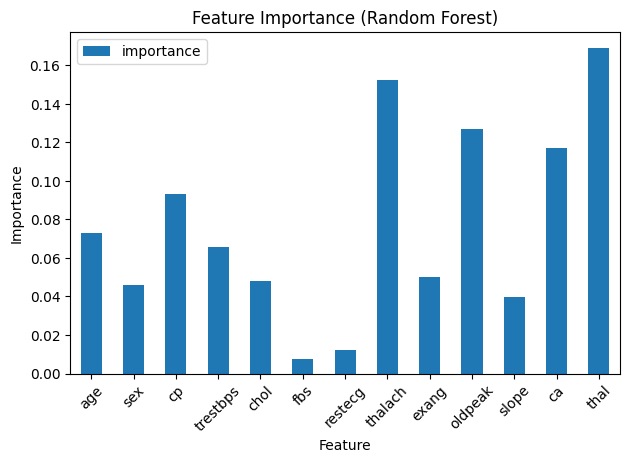

,importance
thal,0.168781
thalach,0.152510
oldpeak,0.126682
ca,0.116829
cp,0.093020


In [12]:
feature_importance = random_forest.feature_importances_
feature_importance_df = pd.DataFrame(index=heart_disease_df.columns[:-1],columns=['importance'])
feature_importance_df['importance'] = feature_importance
feature_importance_df.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
feature_importance_df.nlargest(5,'importance')

این 5 مورد بیشترین تاثیر را تشخیص بیماری قلبی داشتند 

اولین دلیلی که باعث میشه رندوم فورست احتمال کمتری برای آورفیتینگ داشته باشه اینه که هر درخت اون داره یه سمپل رندوم متفاوت از داده ها رو مورد بررسی و شرط گذاری قرار میده پس در گیر الگو خاصی تو داده ها نمیشه 
از طرفی دیگه هر درخت یکسری فیچر رندوم رو برای تصمیم خودش انتخاب میکنه پس یه فیچر قالب وجود نداره که نتیجه رو دستخوش تغییر کنه به تنهایی 
در نهایت با رای اکثریت درخت های جنگل به قضاوت و تصمیم میرسیم که این باعث میشه اگر هم درختی این وسط دچار اورفیتینگ شده باشه رای بقیه درخت ها جلو این رو بگیره 

In [13]:
# classification report
y_train_predict = random_forest.predict(X_train)

y_test_predict = random_forest.predict(X_test)
# classification report
print(classification_report(y_train,y_train_predict))
print(classification_report(y_test,y_test_predict))


              precision    recall  f1-score   support

           0       0.89      0.96      0.93       112
           1       0.95      0.86      0.91        95

    accuracy                           0.92       207
   macro avg       0.92      0.91      0.92       207
weighted avg       0.92      0.92      0.92       207

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        48
           1       0.74      0.76      0.75        42

    accuracy                           0.77        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.77      0.77      0.77        90



recall = (True positive) only persons who model correctly labeld positive / (True positive + False negative)  all True positive even if model labeld it negative

ریکال یعنی تعداد افرادی که مدل به درستی گفته بیمار هستن تقسیم بر تمام بیماران یعنی حتی اونایی که از دست مدل در رفتن و شناسایی نشدن 


وقتی به درد میخوره که تشخیص ندادن بیمار خطر ناکه و منجر به مرگ میشه پس میفهمیم در تشخیص چقدر از بیمار ها ضعیف عمل کرده 

perecision = (True positive) who ones model correctly labeld positive / (TP + FP) all of person who model labeld positive true or false 

یعنی نسبت افرادی که مدل به درستی بیمار تشخیص داده به کل افرادی که مدل بیمار تشخیص داده

با این یکی معیار میفهمیم که تن چه درصدی آدم سالم رو الکی لرزونده و گفته بیمار هستن 

در کل پرسیژن میزان اعتماد به برچسب مثبت رو نشون میده و ریکال میزان  از دست ندادن بیمار 

F1 = 2 × (Precision × Recall) / (Precision + Recall)


اف وان ماینگین هارمونیکه یعنی اگر یکی از این معیار ها بریزه اف وان هم به شدت افت میکنه 

در کل دنبال یک تعادل میگرده که نه الکی کسی رو از بیماری بترسونه مدل نه بیمار ها رو با تشخیص ندادن به کشتن بده 

البته بیمار فقط یک مثال و بحث بحث کلاس هست نه بیمار یا سالم 

Accuracy = (TP + TN) / (TP + TN + FP + FN)


اکیوریسی هم با پرسیژن متفاوته و در یک کلام تمام تشخیص های درست فارق از مثبت و منفی رو به تمام لیبل ها تقسیم میکنه 

In [14]:
# confusion matrix

print('this is how confusion matrix looks like \n[[TN  FP]\n\
 [FN  TP]]')
train_cunf =confusion_matrix(y_train,y_train_predict)
test_cunf = confusion_matrix(y_test,y_test_predict)
print('train data confusion matrix class 1\n',train_cunf)
print('test data confusion matrix class 1\n',test_cunf)
'''
اینجا فقط میخوام ببینم ماتریکسم بر اساس کلاس 1 و 
اینکه ترتیباش درسته یا نه برای همین پرسیژنش رو خودم حساب کردم
 تا با ریپورت سلول قبل مقایسه کنم 
'''
perecision_train = train_cunf[1,1]/(train_cunf[0,1]+train_cunf[1,1])
print('train data perecision for class 1 = ',perecision_train)

this is how confusion matrix looks like 
[[TN  FP]
 [FN  TP]]
train data confusion matrix class 1
 [[108   4]
 [ 13  82]]
test data confusion matrix class 1
 [[37 11]
 [10 32]]
train data perecision for class 1 =  0.9534883720930233


فقط باید این یادمون باشه که این معیار ها بر اساس یک کلاس مثلا 1 یا مثلا ستوسا و... 

و به طور پیش فرض بین 0 و 1 میاد و 1 رو به عنوان کلاس هدف در نظر میگیره پس اینجا از نظر اینکه کلاس هدف 1 هست داره ماتریس رو نشون میده 


در پاسخ به آخرین مطلب سوال دوم هوم ورک باید گفت از دست دادن بیمار قلبی خطر ناک تر است یعنی ریکال ملاک مهم تری برای ما هست 
اما این به این معنا نیست که پرسیژن مهم نیست ! اینکه به یک فرد به اشتباه بگیم بیماری قلبی داره هم خطرناکه و میتونه عواقب بدی داشته  باشه 